# Data Cleaning Starring NBA Shot Log Data: Part III

## Data Cleaning (Continued)

From part 2 we made some of the columns more clear and interpretable. We'll load the dataset below

In [18]:
import pandas as  pd
import os

pd.set_option('display.max_columns', 30)

parent_path = os.path.dirname(os.path.dirname(os.getcwd()))

replace_double_slash = parent_path.replace('\\', '/')

data_path = replace_double_slash + '/data/shot_logs_clean_2.csv'

nba_step_3 = pd.read_csv(data_path)

In [19]:
nba_step_3.head()

,Game Id,Date,Home Team,Away Team,Winning Team,Losing Team,W,Final Margin,Shot Number,Period,Game Clock,Shot Clock,Dribbles,Touch Time,Shot Dist,Pts Type,Shot Result,Closest Defender,Closest Defender Player Id,Close Def Dist,Fgm,Pts,Player Name,Player Id
0,21400899,2015-03-04,BKN,CHA,CHA,BKN,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,2015-03-04,BKN,CHA,CHA,BKN,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,2015-03-04,BKN,CHA,CHA,BKN,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,2015-03-04,BKN,CHA,CHA,BKN,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,2015-03-04,BKN,CHA,CHA,BKN,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


Since we were able to extract the winning team in the third column, we don't really need the W column anymore and can remove it

In [20]:
nba_step_3.drop('W', axis='columns', inplace=True)

nba_step_3.head()

,Game Id,Date,Home Team,Away Team,Winning Team,Losing Team,Final Margin,Shot Number,Period,Game Clock,Shot Clock,Dribbles,Touch Time,Shot Dist,Pts Type,Shot Result,Closest Defender,Closest Defender Player Id,Close Def Dist,Fgm,Pts,Player Name,Player Id
0,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


Now we're going to focus on handling the missing values in the shot clock column and how to impute those values. For the sake of ease of interpretation, we will get do the following

1. Get the list of unique game IDs
2. Use Numpy's random module to get 10 random game IDs
3. Filter data frame on these game IDs

For the sake of replicability, the seed is set to 42 (because...42. If you want to experiment and are not worried about a difference in results, feel free to not set the seed or to whatever seed you want and continue)


In [21]:
import numpy as np

Game_ID_List = nba_step_3['Game Id'].unique()

np.random.seed(42)

random_10_game_ids = np.random.choice(Game_ID_List, size=10)

In [22]:
Ten_Games = nba_step_3[nba_step_3["Game Id"].isin(random_10_game_ids)]

Ten_Games.sort_values('Game Id', inplace = True)

Ten_Games.reset_index(drop=True, inplace=True)

print(random_10_game_ids)

Ten_Games

[21400314 21400227 21400505 21400301 21400251 21400812 21400378 21400549
 21400357 21400037]


C:\Users\Test\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Game Id,Date,Home Team,Away Team,Winning Team,Losing Team,Final Margin,Shot Number,Period,Game Clock,Shot Clock,Dribbles,Touch Time,Shot Dist,Pts Type,Shot Result,Closest Defender,Closest Defender Player Id,Close Def Dist,Fgm,Pts,Player Name,Player Id
0,21400037,2014-11-01,UTA,PHX,UTA,PHX,27,12,2,4:07,5.2,1,2.3,2.4,2,missed,"Len, Alex",203458,1.2,0,0,derrick favors,202324
1,21400037,2014-11-01,UTA,PHX,UTA,PHX,27,5,3,9:14,14.4,0,1.8,3.2,2,made,"Morris, Markieff",202693,2.9,1,2,trevor booker,202344
2,21400037,2014-11-01,UTA,PHX,UTA,PHX,27,6,4,9:04,17.4,0,1.0,24.8,3,missed,"Morris, Markieff",202693,6.9,0,0,trevor booker,202344
3,21400037,2014-11-01,UTA,PHX,UTA,PHX,27,7,4,8:35,24.0,0,0.0,1.1,2,made,"Green, Gerald",101123,1.1,1,2,trevor booker,202344
4,21400037,2014-11-01,UTA,PHX,UTA,PHX,27,8,4,7:00,2.6,2,2.4,3.9,2,made,"Morris, Marcus",202694,2.7,1,2,trevor booker,202344
5,21400037,2014-11-01,UTA,PHX,UTA,PHX,27,9,4,4:53,21.6,2,2.8,5.4,2,made,"Plumlee, Miles",203101,8.8,1,2,trevor booker,202344
6,21400037,2014-11-01,UTA,PHX,UTA,PHX,27,1,1,9:12,4.9,0,0.8,24.5,3,missed,"Morris, Markieff",202693,3.7,0,0,enes kanter,202683
7,21400037,2014-11-01,UTA,PHX,UTA,PHX,27,4,3,10:41,23.0,0,1.5,3.0,2,made,"Plumlee, Miles",203101,3.4,1,2,trevor booker,202344
8,21400037,2014-11-01,UTA,PHX,UTA,PHX,27,2,1,6:24,14.4,0,1.6,6.1,2,missed,"Morris, Markieff",202693,1.6,0,0,enes kanter,202683
9,21400037,2014-11-01,UTA,PHX,UTA,PHX,27,1,1,8:47,8.4,0,1.2,0.5,2,made,"Plumlee, Miles",203101,0.4,1,2,derrick favors,202324


You'll notice pandas give a warning that we're manipulating a copy of the original data frame and that original will not change. Since the intention for this step is not to change the original data frame then this is fine. Now we'll subset this data based on whether the shot clock data is missing to analyze a pattern

In [23]:
missing_shot_clock = Ten_Games[Ten_Games['Shot Clock'].isnull()]

missing_shot_clock.head()

,Game Id,Date,Home Team,Away Team,Winning Team,Losing Team,Final Margin,Shot Number,Period,Game Clock,Shot Clock,Dribbles,Touch Time,Shot Dist,Pts Type,Shot Result,Closest Defender,Closest Defender Player Id,Close Def Dist,Fgm,Pts,Player Name,Player Id
33,21400037,2014-11-01,UTA,PHX,UTA,PHX,27,14,3,0:05,NaN,1,1.5,5.9,2,missed,"Len, Alex",203458,1.2,0,0,gordon hayward,202330
43,21400037,2014-11-01,UTA,PHX,UTA,PHX,27,9,2,0:02,NaN,0,0.7,23.1,3,missed,"Len, Alex",203458,18.5,0,0,trey burke,203504
95,21400037,2014-11-01,UTA,PHX,UTA,PHX,-27,14,3,0:00,NaN,1,2.0,33.8,3,missed,"Hood, Rodney",203918,8.6,0,0,gerald green,101123
152,21400227,2014-11-28,TOR,DAL,DAL,TOR,-4,22,4,0:03,NaN,4,3.8,26.7,3,missed,"Barea, Jose Juan",200826,3.8,0,0,kyle lowry,200768
165,21400227,2014-11-28,TOR,DAL,DAL,TOR,-4,21,4,0:10,NaN,5,4.8,4.2,2,made,"Crowder, Jae",203109,0.0,1,2,kyle lowry,200768


So, some basketball knowledge (for those unfamiliar). The shot clock runs for 24 seconds on any given play. Why is this important? Take a look at game clock. Immediately, you'll notice the following

* **The game clock in the head of the data above seems to run under 24 seconds**

Why does that matter? If the game clock is under 24 seconds, the game clock = shot clock! Which may explain why the data is missing But let's verify by plotting the distribution of the time patterns for this data (using pandas native plotting features)

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline  

missing_shot_clock['Game Clock'] = pd.to_datetime(missing_shot_clock['Game Clock'], format="%M:%S").dt.time

missing_shot_clock

C:\Users\Test\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Game Id,Date,Home Team,Away Team,Winning Team,Losing Team,Final Margin,Shot Number,Period,Game Clock,Shot Clock,Dribbles,Touch Time,Shot Dist,Pts Type,Shot Result,Closest Defender,Closest Defender Player Id,Close Def Dist,Fgm,Pts,Player Name,Player Id
33,21400037,2014-11-01,UTA,PHX,UTA,PHX,27,14,3,00:00:05,NaN,1,1.5,5.9,2,missed,"Len, Alex",203458,1.2,0,0,gordon hayward,202330
43,21400037,2014-11-01,UTA,PHX,UTA,PHX,27,9,2,00:00:02,NaN,0,0.7,23.1,3,missed,"Len, Alex",203458,18.5,0,0,trey burke,203504
95,21400037,2014-11-01,UTA,PHX,UTA,PHX,-27,14,3,00:00:00,NaN,1,2.0,33.8,3,missed,"Hood, Rodney",203918,8.6,0,0,gerald green,101123
152,21400227,2014-11-28,TOR,DAL,DAL,TOR,-4,22,4,00:00:03,NaN,4,3.8,26.7,3,missed,"Barea, Jose Juan",200826,3.8,0,0,kyle lowry,200768
165,21400227,2014-11-28,TOR,DAL,DAL,TOR,-4,21,4,00:00:10,NaN,5,4.8,4.2,2,made,"Crowder, Jae",203109,0.0,1,2,kyle lowry,200768
196,21400227,2014-11-28,TOR,DAL,DAL,TOR,4,11,2,00:00:02,NaN,18,15.3,21.2,2,missed,"Ross, Terrence",203082,3.9,0,0,mnta ellis,101145
252,21400227,2014-11-28,TOR,DAL,DAL,TOR,-4,10,3,00:00:00,NaN,15,15.5,25.8,3,missed,"Ellis, Monta",101145,2.2,0,0,lou williams,101150
273,21400227,2014-11-28,TOR,DAL,DAL,TOR,-4,20,4,00:00:17,NaN,5,4.5,3.2,2,made,"Parsons, Chandler",202718,5.2,1,2,kyle lowry,200768
341,21400251,2014-12-01,UTA,DEN,DEN,UTA,-2,9,3,00:00:04,NaN,0,1.0,24.3,3,made,"Harris, Gary",203914,6.4,1,3,trey burke,203504
368,21400251,2014-12-01,UTA,DEN,DEN,UTA,-2,18,4,00:00:02,NaN,1,1.8,26.3,3,missed,"Chandler, Wilson",201163,5.4,0,0,gordon hayward,202330


In [25]:
times = np.array(missing_shot_clock['Game Clock'])

print(times)

get_seconds = lambda x: x.second

vfunc = np.vectorize(get_seconds)

seconds = vfunc(times)

[datetime.time(0, 0, 5) datetime.time(0, 0, 2) datetime.time(0, 0)
 datetime.time(0, 0, 3) datetime.time(0, 0, 10) datetime.time(0, 0, 2)
 datetime.time(0, 0) datetime.time(0, 0, 17) datetime.time(0, 0, 4)
 datetime.time(0, 0, 2) datetime.time(0, 0) datetime.time(0, 0)
 datetime.time(0, 0, 1) datetime.time(0, 0, 1) datetime.time(0, 0, 3)
 datetime.time(0, 0, 3) datetime.time(0, 0, 9) datetime.time(0, 0, 3)
 datetime.time(0, 0, 7) datetime.time(0, 0, 4) datetime.time(0, 0, 17)
 datetime.time(0, 0, 1) datetime.time(0, 0, 7) datetime.time(0, 0, 2)
 datetime.time(0, 0) datetime.time(0, 0, 12) datetime.time(0, 0, 3)
 datetime.time(0, 0, 6) datetime.time(0, 0, 14) datetime.time(0, 0)
 datetime.time(0, 0, 21) datetime.time(0, 0) datetime.time(0, 0, 5)
 datetime.time(0, 0, 3) datetime.time(0, 0, 16) datetime.time(0, 0, 3)
 datetime.time(0, 0, 1) datetime.time(0, 0, 7) datetime.time(0, 0, 21)
 datetime.time(0, 0, 3) datetime.time(0, 0, 5) datetime.time(0, 0, 2)]


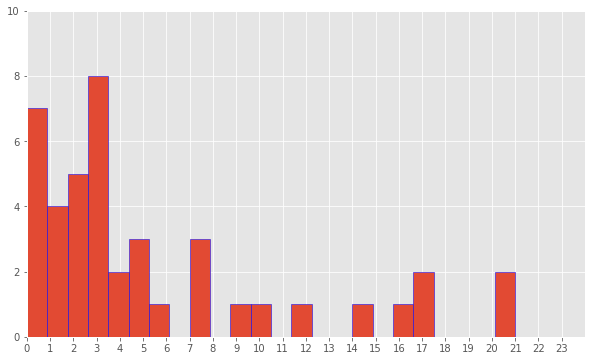

In [26]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)

ax.set_xlim((0,24))

ax.set_xticks(np.arange(24))

ax.set_ylim((0, 10))

plt.hist(seconds, edgecolor='blue', align='mid', bins=24)

plt.show()

So based on the initial random data, we notice that the distribution of game clock data is less than 24 whenver shot clock is missing. So it seems to be that we can impute the missing values of shot clock to be to the corresponding game clock value. Now we'll use the whole data subset that contains missing shot clock information to verify

In [27]:
import datetime as dt

all_missing = nba_step_3[nba_step_3['Shot Clock'].isnull()]

all_missing['Game Clock'] = pd.to_datetime(all_missing['Game Clock'], format="%M:%S").dt.time

C:\Users\Test\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [28]:
all_times = np.array(all_missing['Game Clock'])

Before we plot, let's check to make sure that our theory holds true. Let's sort the data frame by decreasing times

In [29]:
sorted_times = all_missing.sort_values("Game Clock", ascending=False)

sorted_times.reset_index(drop=True, inplace=True)

sorted_times

,Game Id,Date,Home Team,Away Team,Winning Team,Losing Team,Final Margin,Shot Number,Period,Game Clock,Shot Clock,Dribbles,Touch Time,Shot Dist,Pts Type,Shot Result,Closest Defender,Closest Defender Player Id,Close Def Dist,Fgm,Pts,Player Name,Player Id
0,21400088,2014-11-08,MIL,MEM,MIL,MEM,1,7,4,00:11:52,NaN,1,3.4,7.1,2,missed,"Leuer, Jon",202720,2.1,0,0,giannis antetokounmpo,203507
1,21400115,2014-11-12,DEN,POR,POR,DEN,-17,6,4,00:11:51,NaN,0,1.2,25.7,3,missed,"Barton, Will",203115,6.9,0,0,danilo gallinai,201568
2,21400088,2014-11-08,MIL,MEM,MIL,MEM,-1,5,3,00:11:51,NaN,0,0.0,22.0,2,missed,"Middleton, Khris",203114,5.3,0,0,marc gasol,201188
3,21400616,2015-01-19,MEM,DAL,DAL,MEM,8,14,4,00:11:50,NaN,0,0.9,19.5,2,missed,"Lee, Courtney",201584,6.6,0,0,mnta ellis,101145
4,21400300,2014-12-07,LAL,NOP,NOP,LAL,-17,4,2,00:11:50,NaN,0,0.8,3.4,2,made,"Anderson, Ryan",201583,3.3,1,2,carlos boozer,2430
5,21400115,2014-11-12,DEN,POR,POR,DEN,-17,1,1,00:11:50,NaN,1,1.4,5.2,2,missed,"Aldridge, LaMarcus",200746,1.4,0,0,kenneth faried,202702
6,21400648,2015-01-23,SAS,LAL,SAS,LAL,14,4,2,00:11:50,NaN,0,0.9,24.2,3,missed,"Young, Nick",201156,5.3,0,0,aron baynes,203382
7,21400814,2015-02-20,GSW,SAS,GSW,SAS,11,3,3,00:11:49,NaN,0,1.2,1.2,2,missed,"Duncan, Tim",1495,5.2,0,0,andrew bogut,101106
8,21400648,2015-01-23,SAS,LAL,SAS,LAL,14,7,3,00:11:48,NaN,0,0.8,22.1,2,missed,"Kelly, Ryan",203527,7.1,0,0,kawhi leonard,202695
9,21400115,2014-11-12,DEN,POR,POR,DEN,17,9,3,00:11:48,NaN,12,11.8,10.5,2,missed,"Gee, Alonzo",202087,1.7,0,0,damian lillard,203081


Wait a second, the highest time is 11 minutes and 50 seconds? 

Looking further into the data you'll notice that various times from 11:50 to 1 second have missing data. 

So, we might have to change our approach. Let's see the percentage of missing information with game clock greater than 24 vs less than 24 seconds.

In [30]:
less_eq_24 = [val for val in all_times if val <= dt.time(0,0,24)]

ge_24 = [val for val in all_times if val > dt.time(0,0,24)]

print('Number of times times when missing data had Game Clock of less than or equal to 24 seconds: ' + str(len(less_eq_24)))

print('Number of times times when missing data had Game Clock greater than 24 seconds: ' + str(len(ge_24)) + ('\n'))

total_rows = nba_step_3.shape[0]

print('Percentage of total data of the first critera: ' + '{:.2%}'.format(len(less_eq_24)/total_rows))
print('Percentage of total data of the second critera: ' + '{:.2%}'.format(len(ge_24)/total_rows) + "\n")

print('Percentage of missing shot clock data that had game clock with less than or equal to 24 seconds: ' + '{:.2%}'.format(len(less_eq_24)/len(all_times)))
print('Percentage of missing shot clock data that had game clock with greater than 24 seconds: ' + '{:.2%}'.format(len(ge_24)/len(all_times)))

Number of times times when missing data had Game Clock of less than or equal to 24 seconds: 3554
Number of times times when missing data had Game Clock greater than 24 seconds: 2013

Percentage of total data of the first critera: 2.78%
Percentage of total data of the second critera: 1.57%

Percentage of missing shot clock data that had game clock with less than or equal to 24 seconds: 63.84%
Percentage of missing shot clock data that had game clock with greater than 24 seconds: 36.16%


So for about 64% of our missing cases, we can impute the shot clock data to be equivalent to the game clock data. So what can we do with the other set? It's about 1.6 % of the total data, so it's fair to say we can delete it. For reference, let's go back to the orginal data set and format the game clock column like we did when looking at just the missing data. To make life easier we'll also change the type of the Date column to be a date type

In [31]:
nba_step_3['Date'] = pd.to_datetime(nba_step_3['Date'], format='%Y-%m-%d').dt.date

nba_step_3['Game Clock'] = pd.to_datetime(nba_step_3['Game Clock'], format='%M:%S').dt.time

nba_step_3.shape

(128069, 23)

So first, we'lll remove the values that have missing shot clock data and game clock times greater than 24 seconds

In [32]:
nba_remove_step_1 = nba_step_3[~((nba_step_3['Shot Clock'].isnull()) & (nba_step_3['Game Clock'] > dt.time(0,0,24)))]

nba_remove_step_1

,Game Id,Date,Home Team,Away Team,Winning Team,Losing Team,Final Margin,Shot Number,Period,Game Clock,Shot Clock,Dribbles,Touch Time,Shot Dist,Pts Type,Shot Result,Closest Defender,Closest Defender Player Id,Close Def Dist,Fgm,Pts,Player Name,Player Id
0,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,1,1,00:01:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,2,1,00:00:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,3,1,00:00:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,4,2,00:11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,5,2,00:10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,6,2,00:08:15,9.1,2,4.4,18.4,2,missed,"Williams, Deron",101114,2.6,0,0,brian roberts,203148
6,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,7,4,00:10:15,14.5,11,9.0,20.7,2,missed,"Jack, Jarrett",101127,6.1,0,0,brian roberts,203148
7,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,8,4,00:08:00,3.4,3,2.5,3.5,2,made,"Plumlee, Mason",203486,2.1,1,2,brian roberts,203148
8,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,9,4,00:05:14,12.4,0,0.8,24.6,3,missed,"Morris, Darius",202721,7.3,0,0,brian roberts,203148
9,21400890,2015-03-03,CHA,LAL,CHA,LAL,1,1,2,00:11:32,17.4,0,1.1,22.4,3,missed,"Ellington, Wayne",201961,19.8,0,0,brian roberts,203148


Now we can impute the missing shot clock values with the value of seconds in game clock

In [33]:
nba_imputed = nba_remove_step_1[:]

def impute_nan(df):
    if pd.isnull(df['Shot Clock']) :
        return(df['Game Clock'].second)
    else:
        return(df['Shot Clock'])

nba_imputed['Shot Clock'] = nba_imputed.apply(impute_nan, axis = 1)

nba_imputed.head(10)

,Game Id,Date,Home Team,Away Team,Winning Team,Losing Team,Final Margin,Shot Number,Period,Game Clock,Shot Clock,Dribbles,Touch Time,Shot Dist,Pts Type,Shot Result,Closest Defender,Closest Defender Player Id,Close Def Dist,Fgm,Pts,Player Name,Player Id
0,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,1,1,00:01:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,2,1,00:00:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,3,1,00:00:00,0.0,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,4,2,00:11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,5,2,00:10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,6,2,00:08:15,9.1,2,4.4,18.4,2,missed,"Williams, Deron",101114,2.6,0,0,brian roberts,203148
6,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,7,4,00:10:15,14.5,11,9.0,20.7,2,missed,"Jack, Jarrett",101127,6.1,0,0,brian roberts,203148
7,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,8,4,00:08:00,3.4,3,2.5,3.5,2,made,"Plumlee, Mason",203486,2.1,1,2,brian roberts,203148
8,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,9,4,00:05:14,12.4,0,0.8,24.6,3,missed,"Morris, Darius",202721,7.3,0,0,brian roberts,203148
9,21400890,2015-03-03,CHA,LAL,CHA,LAL,1,1,2,00:11:32,17.4,0,1.1,22.4,3,missed,"Ellington, Wayne",201961,19.8,0,0,brian roberts,203148


Now that we've imputed all the missing values, our dataset is almost ready to go. In the next notebook, we'll make some final formatting adjustments to the final data and we should be good (the Player Name and Closest Defender Column)

In [34]:
nba_clean_step_3 = nba_imputed[:]

save_path = replace_double_slash + '/data/shot_logs_clean_3.csv'

nba_clean_step_3.to_csv(save_path, index=False)